In [ ]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 50.2 MB/s eta 0:00:00


In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import Draw

In [ ]:
# Загрузка данных из Excel файла. Укажите правильный путь к вашему файлу.
data = pd.read_excel('ligands_pub.xlsx')

In [ ]:
# Оставляем только столбцы 'Name' и 'SMILES'
data_new = data[['Name', 'SMILES']]


In [ ]:
smiles_data = data_new[data_new['SMILES'].apply(lambda x: isinstance(x, str))]

In [ ]:
# Подготовка целевой молекулы и её отпечатка
target_smiles = "C1C2=CC3=CC=CC=C3N=C2CN1"
target_mol = Chem.MolFromSmiles(target_smiles)
target_fp = AllChem.GetMorganFingerprintAsBitVect(target_mol, radius=2, nBits=1024)

# Функция для расчёта сходства Танимото
def calculate_tanimoto(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024)
        return DataStructs.TanimotoSimilarity(target_fp, fp)  # Используем TanimotoSimilarity для бинарных отпечатков
    return None

# Применение функции к каждому SMILES в таблице
smiles_data['Tanimoto'] = smiles_data['SMILES'].apply(calculate_tanimoto)

                                                    Name  \
1565                                          Cinchophen   
4040                     1,3,5-Benzenetricarboxylic acid   
5466                    2,6-Naphthalenedicarboxylic acid   
4063                                   Pyromellitic Acid   
1561                           3,4-Dihydroxybenzoic acid   
1999                                           Tafamidis   
7090   2-(2,6-Dichlorophenyl)-1,3-benzoxazole-6-carbo...   
5474                                       Silmitasertib   
2284                            Pyrroloquinoline Quinone   
1490                                            Enoxacin   
11218                                       CID 16683000   
8223        6-(Oxalyl-Amino)-1h-Indole-5-Carboxylic Acid   
5849   1,3,2-Benzodioxabismole-5-carboxylic acid, 2,7...   
8546      3-(Oxalyl-Amino)-Naphthalene-2-Carboxylic Acid   
2792                                        Lomefloxacin   
6763   2-(Carboxymethyl)-1-oxo-1,2-dihyd

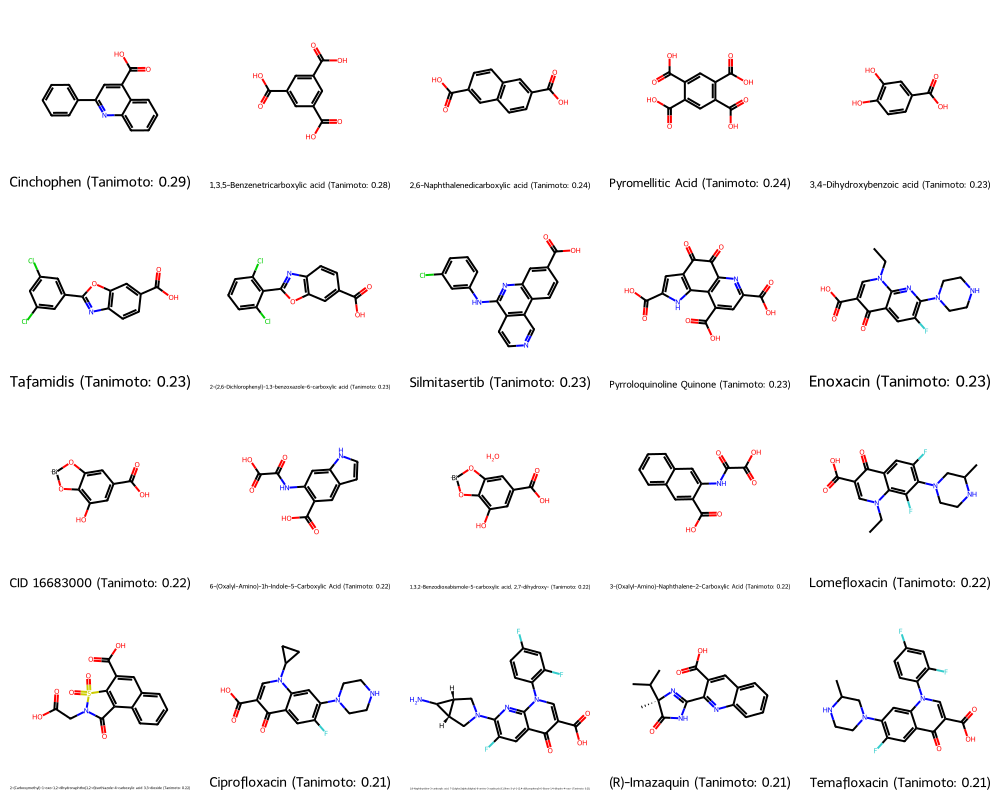

In [ ]:
# Отбор 10 SMILES с наибольшим индексом Танимото (наиболее близким к 1)
most_similar_smiles = smiles_data.nlargest(20, 'Tanimoto')
print(most_similar_smiles)
# Создание списка молекул для отображения
mols_to_draw = [Chem.MolFromSmiles(smiles) for smiles in most_similar_smiles['SMILES']]

# Визуализация молекул
img = Draw.MolsToGridImage(mols_to_draw, molsPerRow=5, subImgSize=(200,200), legends=[f'{most_similar_smiles["Name"].iloc[i]} (Tanimoto: {sim:.2f})' for i,
sim in enumerate(most_similar_smiles['Tanimoto'])])
img

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd

# Предполагаем, что smiles_data уже загружен и содержит колонки: 'SMILES', 'Name', 'Tanimoto'

# Отбор 100 SMILES с наибольшим индексом Танимото (наиболее близким к 1)
most_similar_smiles = smiles_data.nlargest(100, 'Tanimoto')

# 1. Запись топ-100 результатов в текстовый файл
with open('top_100_tanimoto_results.txt', 'w', encoding='utf-8') as f:
    # Заголовок файла
    f.write("Rank\tName\tSMILES\tTanimoto\n")
    f.write("----------------------------------------\n")

    # Запись каждой строки
    for rank, (idx, row) in enumerate(most_similar_smiles.iterrows(), 1):
        f.write(f"{rank}\t{row['Name']}\t{row['SMILES']}\t{row['Tanimoto']:.4f}\n")

print("Топ-100 результатов сохранены в файл 'top_100_tanimoto_results.txt'")

# 2. Визуализация молекул (первые 100, но для отображения лучше взять меньше)
# Ограничим визуализацию первыми 30 молекулами для лучшего отображения
mols_to_draw = [Chem.MolFromSmiles(smiles) for smiles in most_similar_smiles['SMILES'].head(30)]

# Создаем подписи для молекул
legends = [f'{name} (Tanimoto: {sim:.2f})'
           for name, sim in zip(most_similar_smiles['Name'].head(30),
                               most_similar_smiles['Tanimoto'].head(30))]

# Визуализация
img = Draw.MolsToGridImage(mols_to_draw,
                          molsPerRow=5,
                          subImgSize=(200, 200),
                          legends=legends)


Топ-100 результатов сохранены в файл 'top_100_tanimoto_results.txt'
